<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Linear-Models/blob/master/Final_Copy_of_Bhav_Logistic_regression_assignment_burittos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [3]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(423, 66)

In [5]:
df.isnull().sum()

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64

In [0]:
#drop columns with majority of null values to clean the dataset
df1 = df.drop(columns= ['Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Length', 'Circum', 'Volume', 'Mushroom', 'Egg', 'Queso', 'Lobster', 'Nopales', 'Chile relleno', 'Ham', 'Pineapple', 'Taquito'])

In [7]:
df1.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Let's keep on dropping ore columns with majority null values to clean the data
#It would be great to have values for these foof items that we are dropping since they al make a burrito great.
#However, we need to drop these columns since almost all rows are null vales in them and thus we cannot use it in machine learning. 

In [0]:
df2 = df1.drop(columns= ['Cilantro', 'Onion', 'Salsa.1', 'Sauce', 'Cabbage', 'Carrots', 'Bell peper', 'Tomato', 'Lettuce', 'Beans', 'Rice', 'Fish', 'Shrimp', 'Chicken', 'Pork', 'NonSD', 'Unreliable'])

In [10]:
df2.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Beef,Pico,Guac,Cheese,Fries,Sour cream
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,x,x,x,x,x,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,x,x,x,x,x,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,x,x,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,x,x,x,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,x,x,NaN,x,x,NaN


In [11]:
df2.isnull().sum()

Location            0
Burrito             0
Date                0
Neighborhood      331
Address           335
URL               336
Yelp              336
Google            336
Chips             397
Cost                7
Hunger              3
Mass (g)          401
Density (g/mL)    401
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
overall             2
Rec               190
Reviewer            1
Notes             277
Beef              243
Pico              264
Guac              268
Cheese            263
Fries             295
Sour cream        331
dtype: int64

In [0]:
#Let us also drop mass (g) and Density (g/mL)

In [0]:
df3 = df2.drop(columns= ['Mass (g)', 'Density (g/mL)'])

In [0]:
#Some features that we can expect to correlate with a good burrito are cost, meat, tortilla, sour cream, fillings, salsa, wrap, Guac, Cheese, Fries, Meat filling, hunger, etc. 

In [15]:
#find null values
df3.isnull().sum()

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
URL             336
Yelp            336
Google          336
Chips           397
Cost              7
Hunger            3
Tortilla          0
Temp             20
Meat             14
Fillings          3
Meat:filling      9
Uniformity        2
Salsa            25
Synergy           2
Wrap              3
overall           2
Rec             190
Reviewer          1
Notes           277
Beef            243
Pico            264
Guac            268
Cheese          263
Fries           295
Sour cream      331
dtype: int64

In [16]:
df3.head().T

,0,1,2,3,4
Location,Donato's taco shop,Oscar's Mexican food,Oscar's Mexican food,Oscar's Mexican food,Pollos Maria
Burrito,California,California,Carnitas,Carne asada,California
Date,1/18/2016,1/24/2016,1/24/2016,1/24/2016,1/27/2016
Neighborhood,Miramar,San Marcos,NaN,NaN,Carlsbad
Address,6780 Miramar Rd,225 S Rancho Santa Fe Rd,NaN,NaN,3055 Harding St
URL,http://donatostacoshop.net/,http://www.yelp.com/biz/oscars-mexican-food-sa...,NaN,NaN,http://pollosmaria.com/
Yelp,3.5,3.5,NaN,NaN,4
Google,4.2,3.3,NaN,NaN,3.8
Chips,NaN,NaN,NaN,NaN,x
Cost,6.49,5.45,4.85,5.25,6.59


In [0]:
#drop null values
df4 = df3.dropna()

In [18]:
df4.shape

(1, 30)

In [0]:
#so, we cannot drop all null vales, otherwise, we are left with just one row, let's try converting them to the mean later during the logistic regression process

In [20]:
df3.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Beef,Pico,Guac,Cheese,Fries,Sour cream
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,x,x,x,x,x,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,x,x,x,x,x,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,x,x,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,x,x,x,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,x,x,NaN,x,x,NaN


In [21]:
df3.shape

(423, 30)

In [0]:
#Let us drop Location, Address, URL, Rec, Notes, Mass, Density columns

In [0]:
df4 = df3.drop(columns= ['Location', 'Address', 'URL', 'Rec', 'Reviewer', 'Notes'])

In [24]:
df4.head().T

,0,1,2,3,4
Burrito,California,California,Carnitas,Carne asada,California
Date,1/18/2016,1/24/2016,1/24/2016,1/24/2016,1/27/2016
Neighborhood,Miramar,San Marcos,NaN,NaN,Carlsbad
Yelp,3.5,3.5,NaN,NaN,4
Google,4.2,3.3,NaN,NaN,3.8
Chips,NaN,NaN,NaN,NaN,x
Cost,6.49,5.45,4.85,5.25,6.59
Hunger,3,3.5,1.5,2,4
Tortilla,3,2,3,3,4
Temp,5,3.5,2,2,5


In [25]:
df4.dtypes

Burrito          object
Date             object
Neighborhood     object
Yelp            float64
Google          float64
Chips            object
Cost            float64
Hunger          float64
Tortilla        float64
Temp            float64
Meat            float64
Fillings        float64
Meat:filling    float64
Uniformity      float64
Salsa           float64
Synergy         float64
Wrap            float64
overall         float64
Beef             object
Pico             object
Guac             object
Cheese           object
Fries            object
Sour cream       object
dtype: object

In [0]:
#convert columns values to numeric form
df4[["Chips", "Beef", "Pico", "Guac", "Cheese", "Fries", "Sour cream"]] = df4[["Chips", "Beef", "Pico", "Guac", "Cheese", "Fries", "Sour cream"]].apply(pd.to_numeric, errors='ignore')

In [27]:
df4.dtypes

Burrito          object
Date             object
Neighborhood     object
Yelp            float64
Google          float64
Chips            object
Cost            float64
Hunger          float64
Tortilla        float64
Temp            float64
Meat            float64
Fillings        float64
Meat:filling    float64
Uniformity      float64
Salsa           float64
Synergy         float64
Wrap            float64
overall         float64
Beef             object
Pico             object
Guac             object
Cheese           object
Fries            object
Sour cream       object
dtype: object

In [0]:
#We have to use category encoder to convert these object data type columns to categorical variables 

Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

In [0]:
#Let us work with dates and convert them to numeric form


In [0]:
df4['Date'] = pd.to_datetime(df4['Date'], infer_datetime_format=True)

In [30]:
df4['Date'].describe()

count                     423
unique                    169
top       2016-08-30 00:00:00
freq                       29
first     2011-05-16 00:00:00
last      2026-04-25 00:00:00
Name: Date, dtype: object

In [0]:
cutoff = pd.to_datetime('2017-01-01')
train = df4[df4.Date < cutoff]
data2  = df4[df4.Date >= cutoff]


In [32]:
train.head()

,Burrito,Date,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream
0,California,2016-01-18,Miramar,3.5,4.2,NaN,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,x,x,x,x,x,NaN
1,California,2016-01-24,San Marcos,3.5,3.3,NaN,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,x,x,x,x,x,NaN
2,Carnitas,2016-01-24,NaN,NaN,NaN,NaN,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,x,x,NaN,NaN,NaN
3,Carne asada,2016-01-24,NaN,NaN,NaN,NaN,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,x,x,x,NaN,NaN,NaN
4,California,2016-01-27,Carlsbad,4.0,3.8,x,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,x,x,NaN,x,x,NaN


In [33]:
train.tail()

,Burrito,Date,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream
296,California,2016-12-02,South Park,4.0,4.3,NaN,5.65,3.0,4.0,1.5,2.0,3.0,4.2,4.0,3.0,2.0,4.5,2.7,NaN,NaN,NaN,NaN,NaN,NaN
297,Cabeza,2016-12-02,NaN,NaN,NaN,NaN,5.49,3.0,4.5,5.0,2.0,2.0,2.5,3.5,3.0,2.5,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
298,California,2016-12-10,Mission Beach,3.5,3.7,NaN,7.75,4.0,3.5,2.5,3.0,3.3,1.4,2.3,2.2,3.3,4.5,2.9,X,X,NaN,X,X,X
299,Carne asada,2016-12-10,NaN,NaN,NaN,NaN,7.75,4.0,4.0,4.5,2.0,2.0,3.5,3.5,2.0,2.0,4.0,3.0,X,X,X,NaN,NaN,NaN
300,Chicken Shawarma,2016-12-15,Clairemont,4.5,4.6,NaN,6.99,3.7,3.6,4.0,4.0,3.0,3.8,4.3,NaN,3.8,2.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#so we have train dataset isolated with dates 2016 or earlier


In [0]:
#Let us now split data1 dataset into validate and test datasets. Validate on 2017. Test on 2018 & later.

In [35]:
data2.shape
data2 = data2.set_index('Date')
val = data2[:'2017-12'].reset_index()
test  = data2['2018-01':].reset_index()
data2 = data2.reset_index()
val.shape, test.shape

((85, 24), (38, 24))

In [36]:
val.tail()

,Date,Burrito,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream
80,2017-09-05,California,NaN,NaN,NaN,NaN,6.85,3.5,3.0,4.5,3.8,3.8,4.0,3.5,3.5,4.0,3.0,4.10,NaN,NaN,NaN,NaN,NaN,NaN
81,2017-09-05,California,NaN,NaN,NaN,NaN,6.85,3.5,3.0,4.5,4.0,4.0,4.5,3.0,4.0,4.0,3.5,4.25,NaN,NaN,NaN,NaN,NaN,NaN
82,2017-12-16,Steak with guacamole,New York,4.0,4.5,Yes,11.50,3.5,2.0,2.0,4.0,3.5,3.0,4.5,3.5,4.0,2.0,3.50,NaN,NaN,NaN,NaN,NaN,NaN
83,2017-12-29,California,NaN,NaN,NaN,NaN,7.89,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.5,4.3,4.5,4.20,NaN,NaN,NaN,NaN,NaN,NaN
84,2017-12-29,California,NaN,NaN,NaN,NaN,7.89,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,3.0,4.50,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test.head()

,Date,Burrito,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream
0,2026-04-25,California,NaN,NaN,NaN,NaN,8.00,4.0,4.5,5.0,5.0,5.0,4.5,5.0,3.0,5.0,5.0,4.9,x,x,x,x,x,NaN
1,2018-01-02,California,NaN,NaN,NaN,NaN,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-09,Breakfast,National City,4.5,3.8,NaN,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,x,NaN,x
3,2018-01-12,California,Hillcrest,3.5,4.3,NaN,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-12,Local,NaN,NaN,NaN,NaN,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#There seems to be wrong entry in date in first row of test 2026 year, let us remove this row

In [0]:
test.drop(test.index[test['Date'] == '2026-04-25'], inplace = True)

In [40]:
test.head()
#The row starting with 2026 year (an error) is now removed.

,Date,Burrito,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream
1,2018-01-02,California,NaN,NaN,NaN,NaN,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-09,Breakfast,National City,4.5,3.8,NaN,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,x,NaN,x
3,2018-01-12,California,Hillcrest,3.5,4.3,NaN,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-12,Local,NaN,NaN,NaN,NaN,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-04-04,Carne asada,NaN,NaN,NaN,NaN,7.20,3.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,x,x,x,NaN,NaN,NaN


So, we have our train, validation and test datasets isolated per the year criteria.

Begin with baselines for classification.

In [0]:
#We have to define a great burrito as overall >=4 

In [0]:
train = train.dropna(subset=['overall'])
train['Great'] = train['overall'] >= 4

In [43]:
train.head()

,Burrito,Date,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,California,2016-01-18,Miramar,3.5,4.2,NaN,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,x,x,x,x,x,NaN,False
1,California,2016-01-24,San Marcos,3.5,3.3,NaN,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,x,x,x,x,x,NaN,False
2,Carnitas,2016-01-24,NaN,NaN,NaN,NaN,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,x,x,NaN,NaN,NaN,False
3,Carne asada,2016-01-24,NaN,NaN,NaN,NaN,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,x,x,x,NaN,NaN,NaN,False
4,California,2016-01-27,Carlsbad,4.0,3.8,x,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,x,x,NaN,x,x,NaN,True


In [0]:
#drop Burrito, Date, Neighborhood, Yelp. Google columns
train = train.drop(columns= ['Burrito', 'Date', 'Neighborhood', 'Yelp', 'Google'])

In [45]:
train.head()

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,NaN,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,x,x,x,x,x,NaN,False
1,NaN,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,x,x,x,x,x,NaN,False
2,NaN,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,x,x,NaN,NaN,NaN,False
3,NaN,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,x,x,x,NaN,NaN,NaN,False
4,x,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,x,x,NaN,x,x,NaN,True


In [0]:
#Convert True, False in train data to binary 1 and 0
train["Great"] = train["Great"].astype(int)
               

In [47]:

train.head()
#Great column is now converted to 1 and 0

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,NaN,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,x,x,x,x,x,NaN,0
1,NaN,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,x,x,x,x,x,NaN,0
2,NaN,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,x,x,NaN,NaN,NaN,0
3,NaN,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,x,x,x,NaN,NaN,NaN,0
4,x,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,x,x,NaN,x,x,NaN,1


In [0]:
#Do the same with validate dataset

In [49]:
val = val.dropna(subset=['overall'])
val['Great'] = val['overall'] >= 4
val.head()

,Date,Burrito,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,2017-01-04,California,NaN,NaN,NaN,NaN,6.60,NaN,4.0,4.5,4.0,3.5,3.5,5.0,1.5,3.50,4.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2017-01-04,Chile Relleno,NaN,NaN,NaN,NaN,6.60,NaN,4.0,2.0,NaN,4.0,NaN,4.6,4.2,3.75,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2017-01-07,Fusion,NaN,NaN,NaN,NaN,8.50,3.9,3.0,4.5,4.1,3.0,3.7,4.0,4.3,4.20,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2017-01-07,Local,NaN,NaN,NaN,NaN,7.90,4.0,3.5,4.0,4.0,3.0,4.0,4.5,4.0,3.80,4.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2017-01-10,Chicken,NaN,NaN,NaN,NaN,4.99,3.5,2.5,4.5,3.0,2.5,3.0,3.0,2.0,2.00,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [0]:
#drop Burrito, Date, Neighborhood, Yelp. Google columns
val = val.drop(columns= ['Burrito', 'Date', 'Neighborhood', 'Yelp', 'Google'])

In [0]:
val.head()

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,NaN,6.60,NaN,4.0,4.5,4.0,3.5,3.5,5.0,1.5,3.50,4.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,False
1,NaN,6.60,NaN,4.0,2.0,NaN,4.0,NaN,4.6,4.2,3.75,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,8.50,3.9,3.0,4.5,4.1,3.0,3.7,4.0,4.3,4.20,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,False
3,NaN,7.90,4.0,3.5,4.0,4.0,3.0,4.0,4.5,4.0,3.80,4.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,False
4,NaN,4.99,3.5,2.5,4.5,3.0,2.5,3.0,3.0,2.0,2.00,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [0]:
#Convert True, False in train data to binary 1 and 0
val["Great"] = val["Great"].astype(int)

In [52]:
val.head()

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
0,NaN,6.60,NaN,4.0,4.5,4.0,3.5,3.5,5.0,1.5,3.50,4.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,6.60,NaN,4.0,2.0,NaN,4.0,NaN,4.6,4.2,3.75,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,8.50,3.9,3.0,4.5,4.1,3.0,3.7,4.0,4.3,4.20,5.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,7.90,4.0,3.5,4.0,4.0,3.0,4.0,4.5,4.0,3.80,4.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,4.99,3.5,2.5,4.5,3.0,2.5,3.0,3.0,2.0,2.00,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
#Do the same with validate dataset

In [54]:
test = test.dropna(subset=['overall'])
test['Great'] = test['overall'] >= 4
test.head()

,Date,Burrito,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
1,2018-01-02,California,NaN,NaN,NaN,NaN,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2018-01-09,Breakfast,National City,4.5,3.8,NaN,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,x,NaN,x,False
3,2018-01-12,California,Hillcrest,3.5,4.3,NaN,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2018-01-12,Local,NaN,NaN,NaN,NaN,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,False
5,2018-04-04,Carne asada,NaN,NaN,NaN,NaN,7.20,3.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,x,x,x,NaN,NaN,NaN,True


In [0]:
#drop Burrito, Date, Neighborhood, Yelp. Google columns
test = test.drop(columns= ['Burrito', 'Date', 'Neighborhood', 'Yelp', 'Google'])

In [56]:
test.head()

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
1,NaN,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,x,NaN,x,False
3,NaN,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN,True
4,NaN,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,False
5,NaN,7.20,3.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,x,x,x,NaN,NaN,NaN,True


In [0]:
#Convert True, False in train data to binary 1 and 0
test["Great"] = test["Great"].astype(int)

In [0]:
test.head()

,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Beef,Pico,Guac,Cheese,Fries,Sour cream,Great
1,NaN,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,NaN,NaN,NaN,x,NaN,x,0
3,NaN,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,7.20,3.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,x,x,x,NaN,NaN,NaN,1


Begin with baselines for classification

In [58]:
# Train dataset baseline
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.590604
1    0.409396
Name: Great, dtype: float64

In [0]:
#In train dataset, 40.9% burritos are Great.

In [60]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
#baseline accuracy if we guessed the majority class for every prediction on train dataset

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)
#The output is 59.06%.

0.5906040268456376

In [62]:
#baseline accuracy if we guessed the majority class for every prediction on validation dataset.
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)
#The output is 55.29%.

0.5529411764705883

Use scikit-learn for logistic regression.

In [76]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

target = 'Great'
features = ['Tortilla', 'Temp', 'Meat', 'Fillings', 'Salsa', 'Synergy', 'Wrap', 'Cost', 'Meat:filling']
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]
#Hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

#Imputing
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print ('Validation Accuracy', model.score(X_val_scaled, y_val))


Validation Accuracy 0.8235294117647058


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#So, after applying logistic regression using the above features, our validation accuracy improved to 82.35%.

In [0]:
#I can probably improve the validation accuracy further by including features like Guac, Sour cream, Fries and Cheese. They are codes as object data types and will need to be first converted to numerics.
#For now, this is a satisafactory validation accuracy score. 

In [81]:
#Apply to a test case
#features = ['Tortilla', 'Temp', 'Meat', 'Fillings', 'Salsa', 'Synergy', 'Wrap', 'Cost', 'Meat:filling']
test_case = [[3, 4, 4, 4, 4, 5, 5, 8, 5]]  
model.predict(test_case)

array([1])

In [0]:
#So, the model is predicting it as a Great burrito with these inputs (we coded Great Burrito as 1)

In [0]:
#Plot coefficients

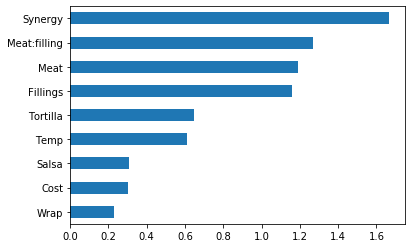

In [69]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [82]:
#Code to generate Kaggle submission
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)
submission = test[['Synergy', 'Meat', 'Fillings']].copy()
submission['Great'] = y_pred
submission['Great']


1     1
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     1
10    0
11    0
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    0
20    0
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    1
29    1
30    0
31    1
32    1
33    0
34    1
35    1
36    1
37    1
Name: Great, dtype: int64

In [0]:
submission.to_csv('burrito-submission-01.csv', index=False)